# 普通线性回归

In [1]:
import numpy as np
import torch
from torch import nn
from torch import optim
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(2019)

## 1 准备数据

In [3]:
x_train = np.linspace(-5, 5, 20)

In [4]:
x_train

array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
        0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
        2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ])

In [5]:
y_rand = [np.random.normal(-1, 1, None) for i in range(20)]
y_train = 2*x_train + 1 + y_rand
y_train

array([-10.21767896,  -8.12591307,  -6.41345903,  -5.51024122,
        -6.15133906,  -4.05123327,  -3.1104491 ,  -2.34385128,
        -1.81458163,   0.42717445,  -1.16330951,   1.23400466,
         2.64848384,   3.169227  ,   4.9813514 ,   5.60016108,
         9.51427768,   8.35953933,   9.79329887,   9.49645842])

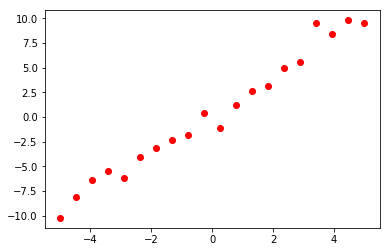

In [6]:
plt.plot(x_train, y_train, 'ro')

In [7]:
X_train = x_train.reshape(20, 1)
y_train = y_train.reshape(20, 1)

## 2 定义模型

In [8]:
class LinearRegression(nn.Module):
    
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        out = self.linear(x) 
        return out

In [9]:
if torch.cuda.is_available():
    model = LinearRegression().cuda()
else:
    model = LinearRegression()

In [10]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)

In [11]:
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train)

In [12]:
epochs = 1000
for epoch in range(epochs):
    inputs = X_train.float().cuda()
    target = y_train.float().cuda()
    out = model(inputs)
    loss = criterion(out, target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 20 == 0:
        print("Epoch {}/{} , loss: {}".format(epoch+1, epochs, loss.data.cpu().numpy()))

Epoch 20/1000 , loss: 26.363525390625
Epoch 40/1000 , loss: 12.960250854492188
Epoch 60/1000 , loss: 6.588842868804932
Epoch 80/1000 , loss: 3.5600197315216064
Epoch 100/1000 , loss: 2.120089054107666
Epoch 120/1000 , loss: 1.4354509115219116
Epoch 140/1000 , loss: 1.1098501682281494
Epoch 160/1000 , loss: 0.9549287557601929
Epoch 180/1000 , loss: 0.8811509013175964
Epoch 200/1000 , loss: 0.8459539413452148
Epoch 220/1000 , loss: 0.8291061520576477
Epoch 240/1000 , loss: 0.8209899067878723
Epoch 260/1000 , loss: 0.8170320391654968
Epoch 280/1000 , loss: 0.8150588870048523
Epoch 300/1000 , loss: 0.8140360116958618
Epoch 320/1000 , loss: 0.8134711980819702
Epoch 340/1000 , loss: 0.8131306767463684
Epoch 360/1000 , loss: 0.8129018545150757
Epoch 380/1000 , loss: 0.8127315640449524
Epoch 400/1000 , loss: 0.8125936388969421
Epoch 420/1000 , loss: 0.8124758005142212
Epoch 440/1000 , loss: 0.8123709559440613
Epoch 460/1000 , loss: 0.8122765421867371
Epoch 480/1000 , loss: 0.8121903538703918
E

In [13]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[1.9759]], device='cuda:0')),
             ('linear.bias', tensor([0.3274], device='cuda:0'))])

In [14]:
model.eval()
predict = model(X_train.float().cuda())

In [15]:
predict = predict.data.cpu().numpy()

In [16]:
X = X_train.float().numpy()

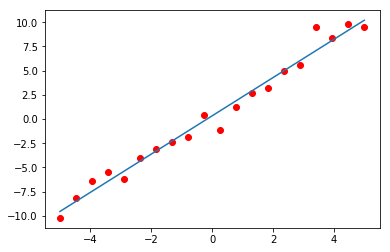

In [17]:
plt.plot(X, y_train.float().numpy(), 'ro')
plt.plot(X, predict, label='Fit Line')